In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
data = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/3cities/trefhtptilecomposites_3cities.nc")

In [3]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [4]:
def plotcomposite(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels(['1-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-99'], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel('CLM5 percentile bin', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def plotcomposite_noxlabel(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels([' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel(' ', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def oplotcomposite(ax, data, color="darkblue"):
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    return ax

#def oplotcomposite_dottedempty(ax, data, color="darkblue"):
#    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidt)


def plotcomposite_lev(data, lev, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot(data, -1.*lev, color=color, linewidth=2)
    ax.plot(data, -1.*lev, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

In [5]:
net_clm5 = -1.*data.fsns_clm5 + data.flns_clm5 + data.shflx_clm5 + data.lhflx_clm5
net_snowd = -1.*data.fsns_snowd + data.flns_snowd + data.shflx_snowd + data.lhflx_snowd

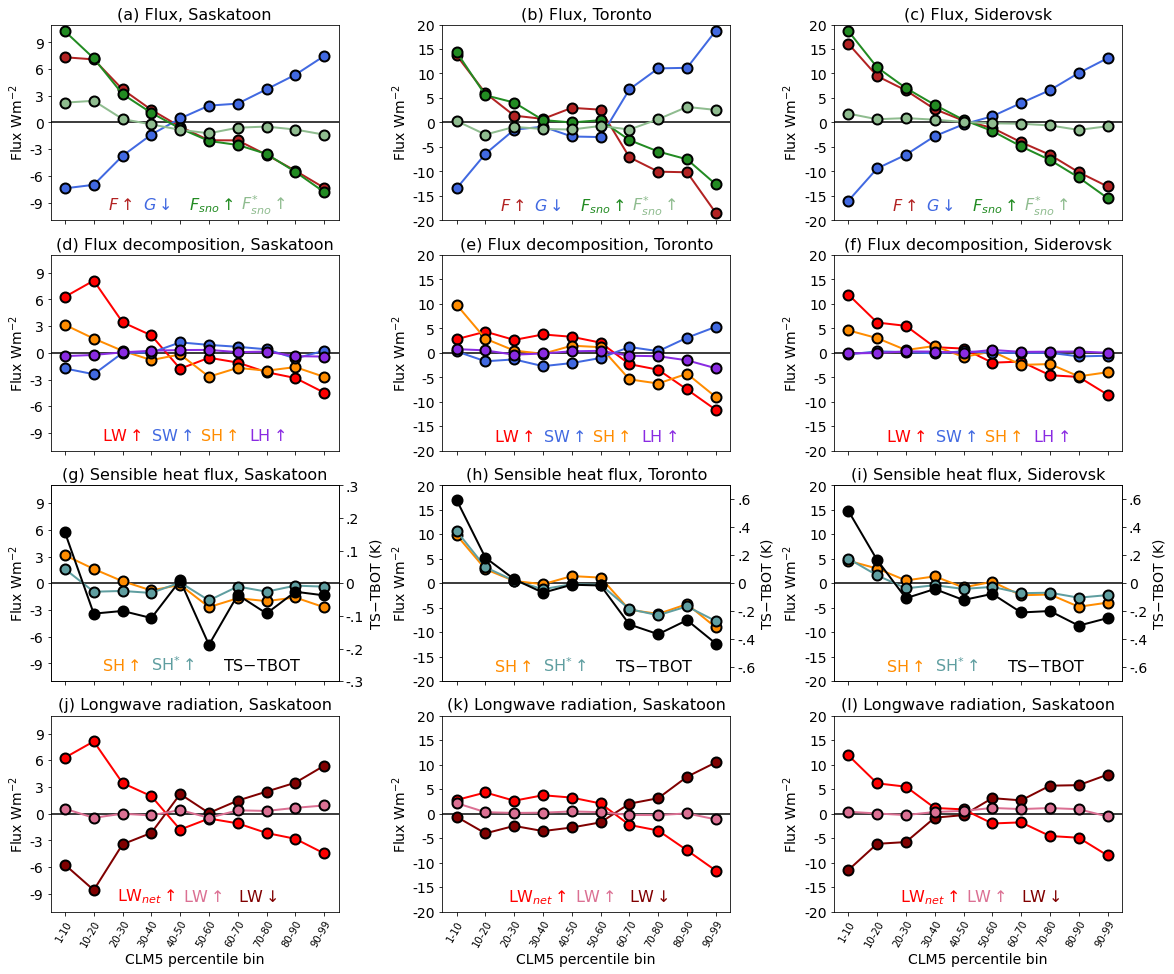

In [6]:
fig = plt.figure(figsize=(16,16))

ax1 = plotcomposite_noxlabel(net_clm5[:,0]-net_snowd[:,0], '(a) Flux, Saskatoon', 'Flux Wm$^{-2}$',0.04,0.29,0.8,0.97,color='firebrick',
                            yrange=(-11,11), yticks=[-9,-6,-3,0,3,6,9],yticknames=['-9','-6','-3','0','3','6','9'])
ax1 = oplotcomposite(ax1, data.fgr_clm5[:,0] - data.fgr_snowd[:,0], color='royalblue')
ax1 = oplotcomposite(ax1, data.snowflux_clm5[:,0] - data.snowflux_snowd[:,0], color='forestgreen')
ax1 = oplotcomposite(ax1, data.snowflux_condfix_clm5[:,0] - data.snowflux_condfix_snowd[:,0], color='darkseagreen')
ax1.text(2.,-9.8,'$F\\uparrow$', color='firebrick', fontsize=16)
ax1.text(3.2, -9.8, '$G\downarrow$', color='royalblue', fontsize=16)
ax1.text(4.8,-9.8,'$F_{sno}\\uparrow$', color='forestgreen', fontsize=16)
ax1.text(6.6, -9.8, '$F^{*}_{sno}\\uparrow$', color='darkseagreen', fontsize=16)

ax2 = plotcomposite_noxlabel(net_clm5[:,1]-net_snowd[:,1], '(b) Flux, Toronto', 'Flux Wm$^{-2}$',0.38,0.63,0.8,0.97,color='firebrick',
                            yrange=[-20,20],yticks=[-20,-15,-10,-5,0,5,10,15,20],yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax2 = oplotcomposite(ax2, data.fgr_clm5[:,1] - data.fgr_snowd[:,1], color='royalblue')
ax2 = oplotcomposite(ax2, data.snowflux_clm5[:,1] - data.snowflux_snowd[:,1], color='forestgreen')
ax2 = oplotcomposite(ax2, data.snowflux_condfix_clm5[:,1] - data.snowflux_condfix_snowd[:,1], color='darkseagreen')
ax2.text(2.,-18,'$F\\uparrow$', color='firebrick', fontsize=16)
ax2.text(3.2, -18, '$G\downarrow$', color='royalblue', fontsize=16)
ax2.text(4.8,-18,'$F_{sno}\\uparrow$', color='forestgreen', fontsize=16)
ax2.text(6.6, -18, '$F^{*}_{sno}\\uparrow$', color='darkseagreen', fontsize=16)


ax3 = plotcomposite_noxlabel(net_clm5[:,2]-net_snowd[:,2], '(c) Flux, Siderovsk', 'Flux Wm$^{-2}$',0.72,0.97,0.8,0.97,color='firebrick',
                            yrange=[-20,20],yticks=[-20,-15,-10,-5,0,5,10,15,20],yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax3 = oplotcomposite(ax3, data.fgr_clm5[:,2] - data.fgr_snowd[:,2], color='royalblue')
ax3 = oplotcomposite(ax3, data.snowflux_clm5[:,2] - data.snowflux_snowd[:,2], color='forestgreen')
ax3 = oplotcomposite(ax3, data.snowflux_condfix_clm5[:,2] - data.snowflux_condfix_snowd[:,2], color='darkseagreen')
ax3.text(2.,-18,'$F\\uparrow$', color='firebrick', fontsize=16)
ax3.text(3.2, -18, '$G\downarrow$', color='royalblue', fontsize=16)
ax3.text(4.8,-18,'$F_{sno}\\uparrow$', color='forestgreen', fontsize=16)
ax3.text(6.6, -18, '$F^{*}_{sno}\\uparrow$', color='darkseagreen', fontsize=16)

ax4 = plotcomposite_noxlabel(data.flns_clm5[:,0] - data.flns_snowd[:,0],'(d) Flux decomposition, Saskatoon','Flux Wm$^{-2}$', 0.04,0.29,0.6,0.77, color='red',
                            yrange=(-11,11), yticks=[-9,-6,-3,0,3,6,9],yticknames=['-9','-6','-3','0','3','6','9'])
ax4 = oplotcomposite(ax4, data.shflx_clm5[:,0] - data.shflx_snowd[:,0], color='darkorange')
ax4 = oplotcomposite(ax4, -1.*(data.fsns_clm5[:,0] - data.fsns_snowd[:,0]), color='royalblue')
ax4 = oplotcomposite(ax4, data.lhflx_clm5[:,0] - data.lhflx_snowd[:,0], color='blueviolet')
ax4.text(1.8,-9.8,'LW$\\uparrow$', color='red', fontsize=16)
ax4.text(3.5,-9.8,'SW$\\uparrow$', color='royalblue', fontsize=16)
ax4.text(5.2,-9.8,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax4.text(6.9,-9.8,'LH$\\uparrow$', color='blueviolet', fontsize=16)


ax5 = plotcomposite_noxlabel(data.flns_clm5[:,1] - data.flns_snowd[:,1],'(e) Flux decomposition, Toronto','Flux Wm$^{-2}$', 0.38,0.63,0.6,0.77, color='red',
                            yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax5 = oplotcomposite(ax5, data.shflx_clm5[:,1] - data.shflx_snowd[:,1], color='darkorange')
ax5 = oplotcomposite(ax5, -1.*(data.fsns_clm5[:,1] - data.fsns_snowd[:,1]), color='royalblue')
ax5 = oplotcomposite(ax5, data.lhflx_clm5[:,1] - data.lhflx_snowd[:,1], color='blueviolet')
ax5.text(1.8,-18,'LW$\\uparrow$', color='red', fontsize=16)
ax5.text(3.5,-18,'SW$\\uparrow$', color='royalblue', fontsize=16)
ax5.text(5.2,-18,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax5.text(6.9,-18,'LH$\\uparrow$', color='blueviolet', fontsize=16)


ax6 = plotcomposite_noxlabel(data.flns_clm5[:,2] - data.flns_snowd[:,2],'(f) Flux decomposition, Siderovsk','Flux Wm$^{-2}$', 0.72,0.97,0.6,0.77, color='red',
                            yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax6 = oplotcomposite(ax6, data.shflx_clm5[:,2] - data.shflx_snowd[:,2], color='darkorange')
ax6 = oplotcomposite(ax6, -1.*(data.fsns_clm5[:,2] - data.fsns_snowd[:,2]), color='royalblue')
ax6 = oplotcomposite(ax6, data.lhflx_clm5[:,2] - data.lhflx_snowd[:,2], color='blueviolet')
ax6.text(1.8,-18,'LW$\\uparrow$', color='red', fontsize=16)
ax6.text(3.5,-18,'SW$\\uparrow$', color='royalblue', fontsize=16)
ax6.text(5.2,-18,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax6.text(6.9,-18,'LH$\\uparrow$', color='blueviolet', fontsize=16)

ax7 = plotcomposite_noxlabel(data.shflx_clm5[:,0] - data.shflx_snowd[:,0],'(g) Sensible heat flux, Saskatoon','Flux Wm$^{-2}$', 0.04,0.29,0.4,0.57,color='darkorange',
                            yrange=(-11,11), yticks=[-9,-6,-3,0,3,6,9], yticknames=['-9','-6','-3','0','3','6','9'])
ax7 = oplotcomposite(ax7, data.shflxconstruct_clm5[:,0]-data.shflxconstruct_snowd[:,0], color='cadetblue')
ax7_2 = ax7.twinx()
ax7_2.set_ylim(-0.3,0.3)
ax7_2 = oplotcomposite(ax7_2, (data.ts_clm5[:,0]-data.tbot_clm5[:,0]) - (data.ts_snowd[:,0] - data.tbot_snowd[:,0]),color='black')
ax7_2.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
ax7_2.set_yticklabels(['-.3','-.2','-.1','0','.1','.2','.3'], fontsize=14)
ax7_2.set_ylabel('TS$-$TBOT (K)', fontsize=14)
ax7.text(1.8,-9.8,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax7.text(3.5,-9.8,'SH$^{*}\\uparrow$', color='cadetblue', fontsize=16)
ax7.text(6,-9.8,'TS$-$TBOT', color='black', fontsize=16)


ax8 = plotcomposite_noxlabel(data.shflx_clm5[:,1] - data.shflx_snowd[:,1],'(h) Sensible heat flux, Toronto', 'Flux Wm$^{-2}$', 0.38,0.63,0.4,0.57,color='darkorange',
                            yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax8 = oplotcomposite(ax8, data.shflxconstruct_clm5[:,1] - data.shflxconstruct_snowd[:,1], color='cadetblue')

ax8_2 = ax8.twinx()
ax8_2.set_ylim(-0.7,0.7)
ax8_2 = oplotcomposite(ax8_2, (data.ts_clm5[:,1]-data.tbot_clm5[:,1]) - (data.ts_snowd[:,1] - data.tbot_snowd[:,1]),color='black')
ax8_2.set_yticks([-0.6,-0.4,-0.2,0.,0.2,0.4,0.6])
ax8_2.set_yticklabels(['-.6','-.4','-.2','0','.2','.4','.6'], fontsize=14)
ax8_2.set_ylabel('TS$-$TBOT (K)', fontsize=14)
ax8.text(1.8,-18,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax8.text(3.5,-18,'SH$^{*}\\uparrow$', color='cadetblue', fontsize=16)
ax8.text(6,-18,'TS$-$TBOT', color='black', fontsize=16)



ax9 = plotcomposite_noxlabel(data.shflx_clm5[:,2] - data.shflx_snowd[:,2],'(i) Sensible heat flux, Siderovsk','Flux Wm$^{-2}$', 0.72,0.97,0.4,0.57,color='darkorange',
                            yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax9 = oplotcomposite(ax9, data.shflxconstruct_clm5[:,2] - data.shflxconstruct_snowd[:,2], color='cadetblue')

ax9_2 = ax9.twinx()
ax9_2.set_ylim(-0.7,0.7)
ax9_2 = oplotcomposite(ax9_2, (data.ts_clm5[:,2]-data.tbot_clm5[:,2]) - (data.ts_snowd[:,2] - data.tbot_snowd[:,2]),color='black')
ax9_2.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
ax9_2.set_yticklabels(['-.6','-.4','-.2','0','.2','.4','.6'], fontsize=14)
ax9_2.set_ylabel('TS$-$TBOT (K)', fontsize=14)
ax9.text(1.8,-18,'SH$\\uparrow$', color='darkorange', fontsize=16)
ax9.text(3.5,-18,'SH$^{*}\\uparrow$', color='cadetblue', fontsize=16)
ax9.text(6,-18,'TS$-$TBOT', color='black', fontsize=16)


flus_clm5 = data.flns_clm5 + data.flds_clm5
flus_snowd = data.flns_snowd + data.flds_snowd

ax10 = plotcomposite(data.flns_clm5[:,0] - data.flns_snowd[:,0],'(j) Longwave radiation, Saskatoon','Flux Wm$^{-2}$',0.04,0.29,0.2,0.37,color='red',
                              yrange=(-11,11), yticks=[-9,-6,-3,0,3,6,9],yticknames=(['-9','-6','-3','0','3','6','9']))
ax10 = oplotcomposite(ax10, data.flds_clm5[:,0] - data.flds_snowd[:,0], color='maroon')
ax10 = oplotcomposite(ax10, flus_clm5[:,0] - flus_snowd[:,0], color='palevioletred')
ax10.text(2.3,-9.8,'LW$_{net}\\uparrow$', color='red', fontsize=16)
ax10.text(4.6,-9.8,'LW$\\uparrow$', color='palevioletred', fontsize=16)
ax10.text(6.5,-9.8,'LW$\\downarrow$', color='maroon', fontsize=16)

ax11 = plotcomposite(data.flns_clm5[:,1] - data.flns_snowd[:,1],'(k) Longwave radiation, Saskatoon','Flux Wm$^{-2}$',0.38,0.63,0.2,0.37,color='red',
                              yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20],yticknames=(['-20','-15','-10','-5','0','5','10','15','20']))
ax11 = oplotcomposite(ax11, data.flds_clm5[:,1] - data.flds_snowd[:,1], color='maroon')
ax11 = oplotcomposite(ax11, flus_clm5[:,1] - flus_snowd[:,1], color='palevioletred')
ax11.text(2.3,-18,'LW$_{net}\\uparrow$', color='red', fontsize=16)
ax11.text(4.6,-18,'LW$\\uparrow$', color='palevioletred', fontsize=16)
ax11.text(6.5,-18,'LW$\\downarrow$', color='maroon', fontsize=16)


ax12 = plotcomposite(data.flns_clm5[:,2] - data.flns_snowd[:,2],'(l) Longwave radiation, Saskatoon','Flux Wm$^{-2}$',0.72,0.97,0.2,0.37,color='red',
                              yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20],yticknames=(['-20','-15','-10','-5','0','5','10','15','20']))
ax12 = oplotcomposite(ax12, data.flds_clm5[:,2] - data.flds_snowd[:,2], color='maroon')
ax12 = oplotcomposite(ax12, flus_clm5[:,2] - flus_snowd[:,2], color='palevioletred')
ax12.text(2.3,-18,'LW$_{net}\\uparrow$', color='red', fontsize=16)
ax12.text(4.6,-18,'LW$\\uparrow$', color='palevioletred', fontsize=16)
ax12.text(6.5,-18,'LW$\\downarrow$', color='maroon', fontsize=16)

fig.savefig(plotpath+'fig7.pdf', facecolor='white', bbox_inches='tight')

